# Initial benchmarking

This notebook shows initial benchmarking results for different join algorithms. The benchmark was run on Spark in local mode, 4G for driver and executor memory and cut-off time of 30 minutes (jobs taking more than that were aborted). Following generated datasets are used for benchmarking:

all-to-all
: Point intervals (from = to), the expected result is a full cartesian join per group.

continous-16
: Effectively one-to-16, database of point intervals and query spanning for 16 units, no intervals' overlapping.

one-to-all
: Database of point intervals and query consisting one interval covering whole database.

one-to-one
: Both database and query contain point intervals, expected 1:1 results.

spanning-16
: Database of point intervals and query intervals of length of 32 with sliding window ([1-33], [2-34], [3-35], ...). Query intervals do overlap.

spanning-4
: Similar to _spanning-16_, but with query interval length of 8.

sparse-16
: Similar to one-to-one, but query dataset is sparse and cotains only every 16th interval (1/16 of 1:1 dataset's intervals).

## Join algorithms
- broadcast-ailist: reference implementation downloading all _database_ data to the driver and computing AIList there.
- native-ailist: proposed solution computing AIList using Spark native transformations.
- partitioned-ailist: reference implementation, but computing the AILists on executors as a RDD custom transformation, partitioned via Bucketizer.
- partitioned-native-ailist: proposed solution computing AIList using Spark native transformations, partitioned via Bucketizer.
- spark-native-bucketing: not optimized approach, partitioned via Bucketizer

In [1]:
%run Common.ipynb

## Cluster run - local[*]

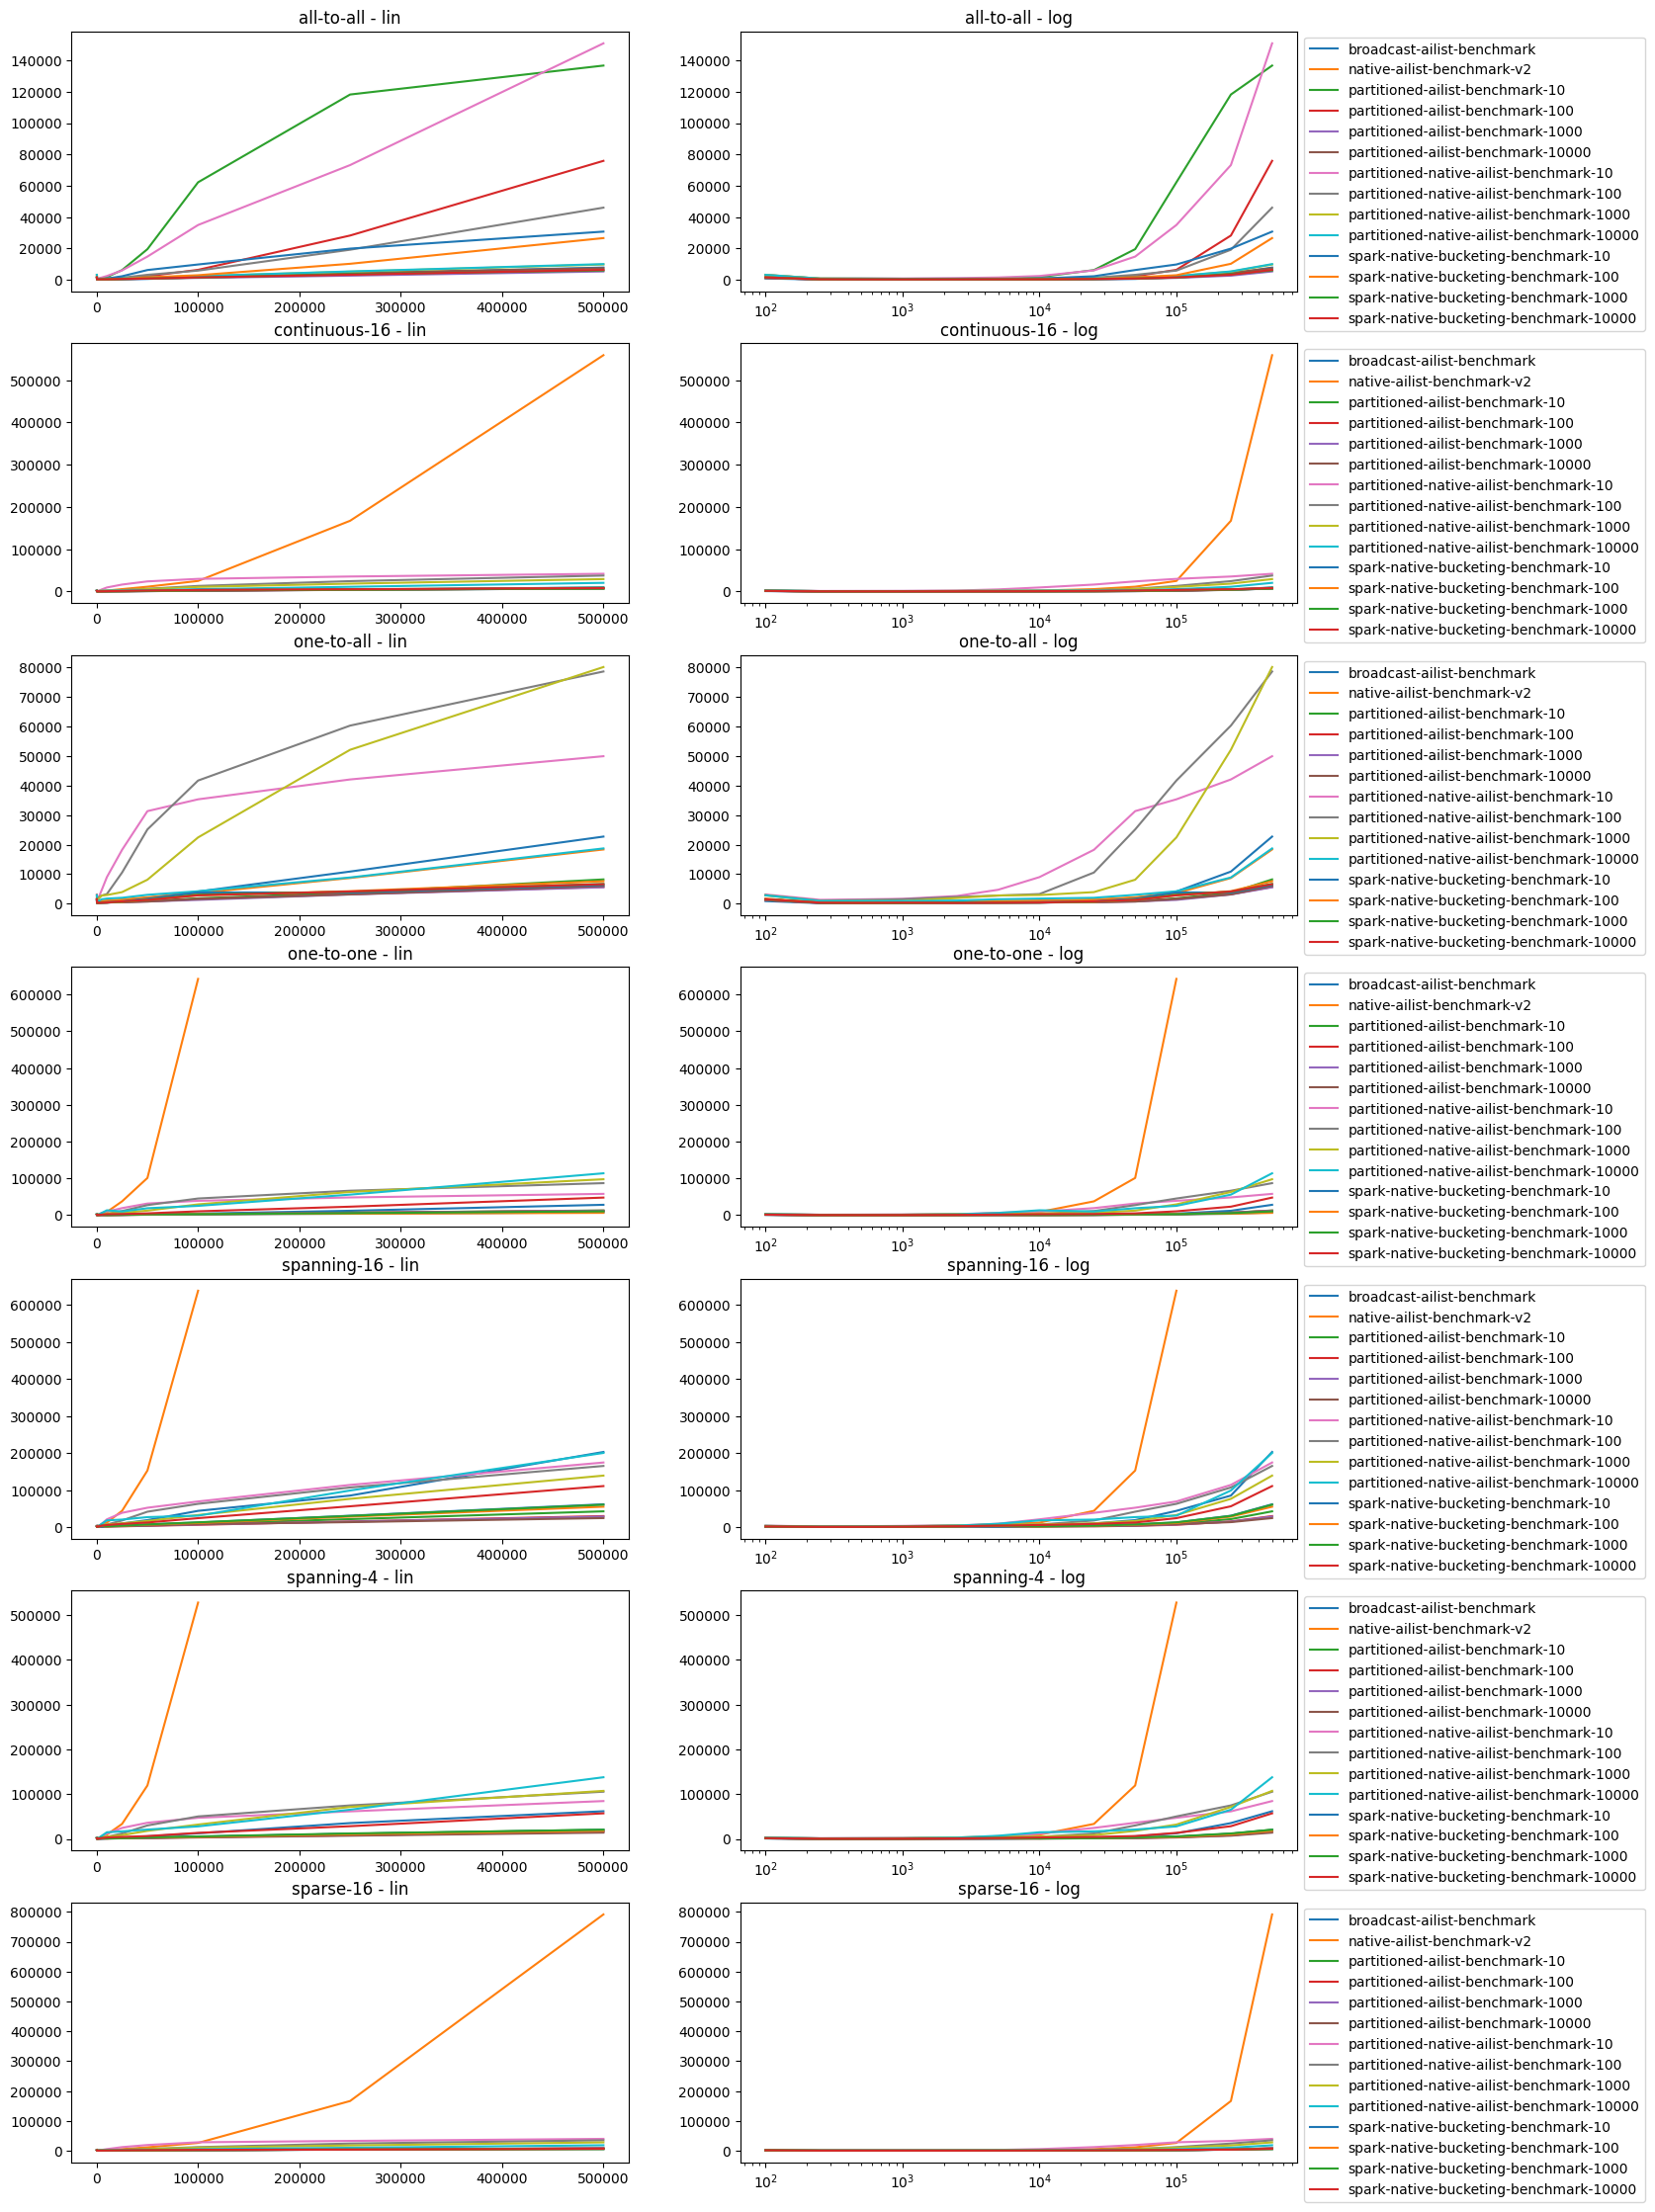

In [2]:
plot_dataset("local")

## Cluster run - 4G driver memory, 6G executor memory

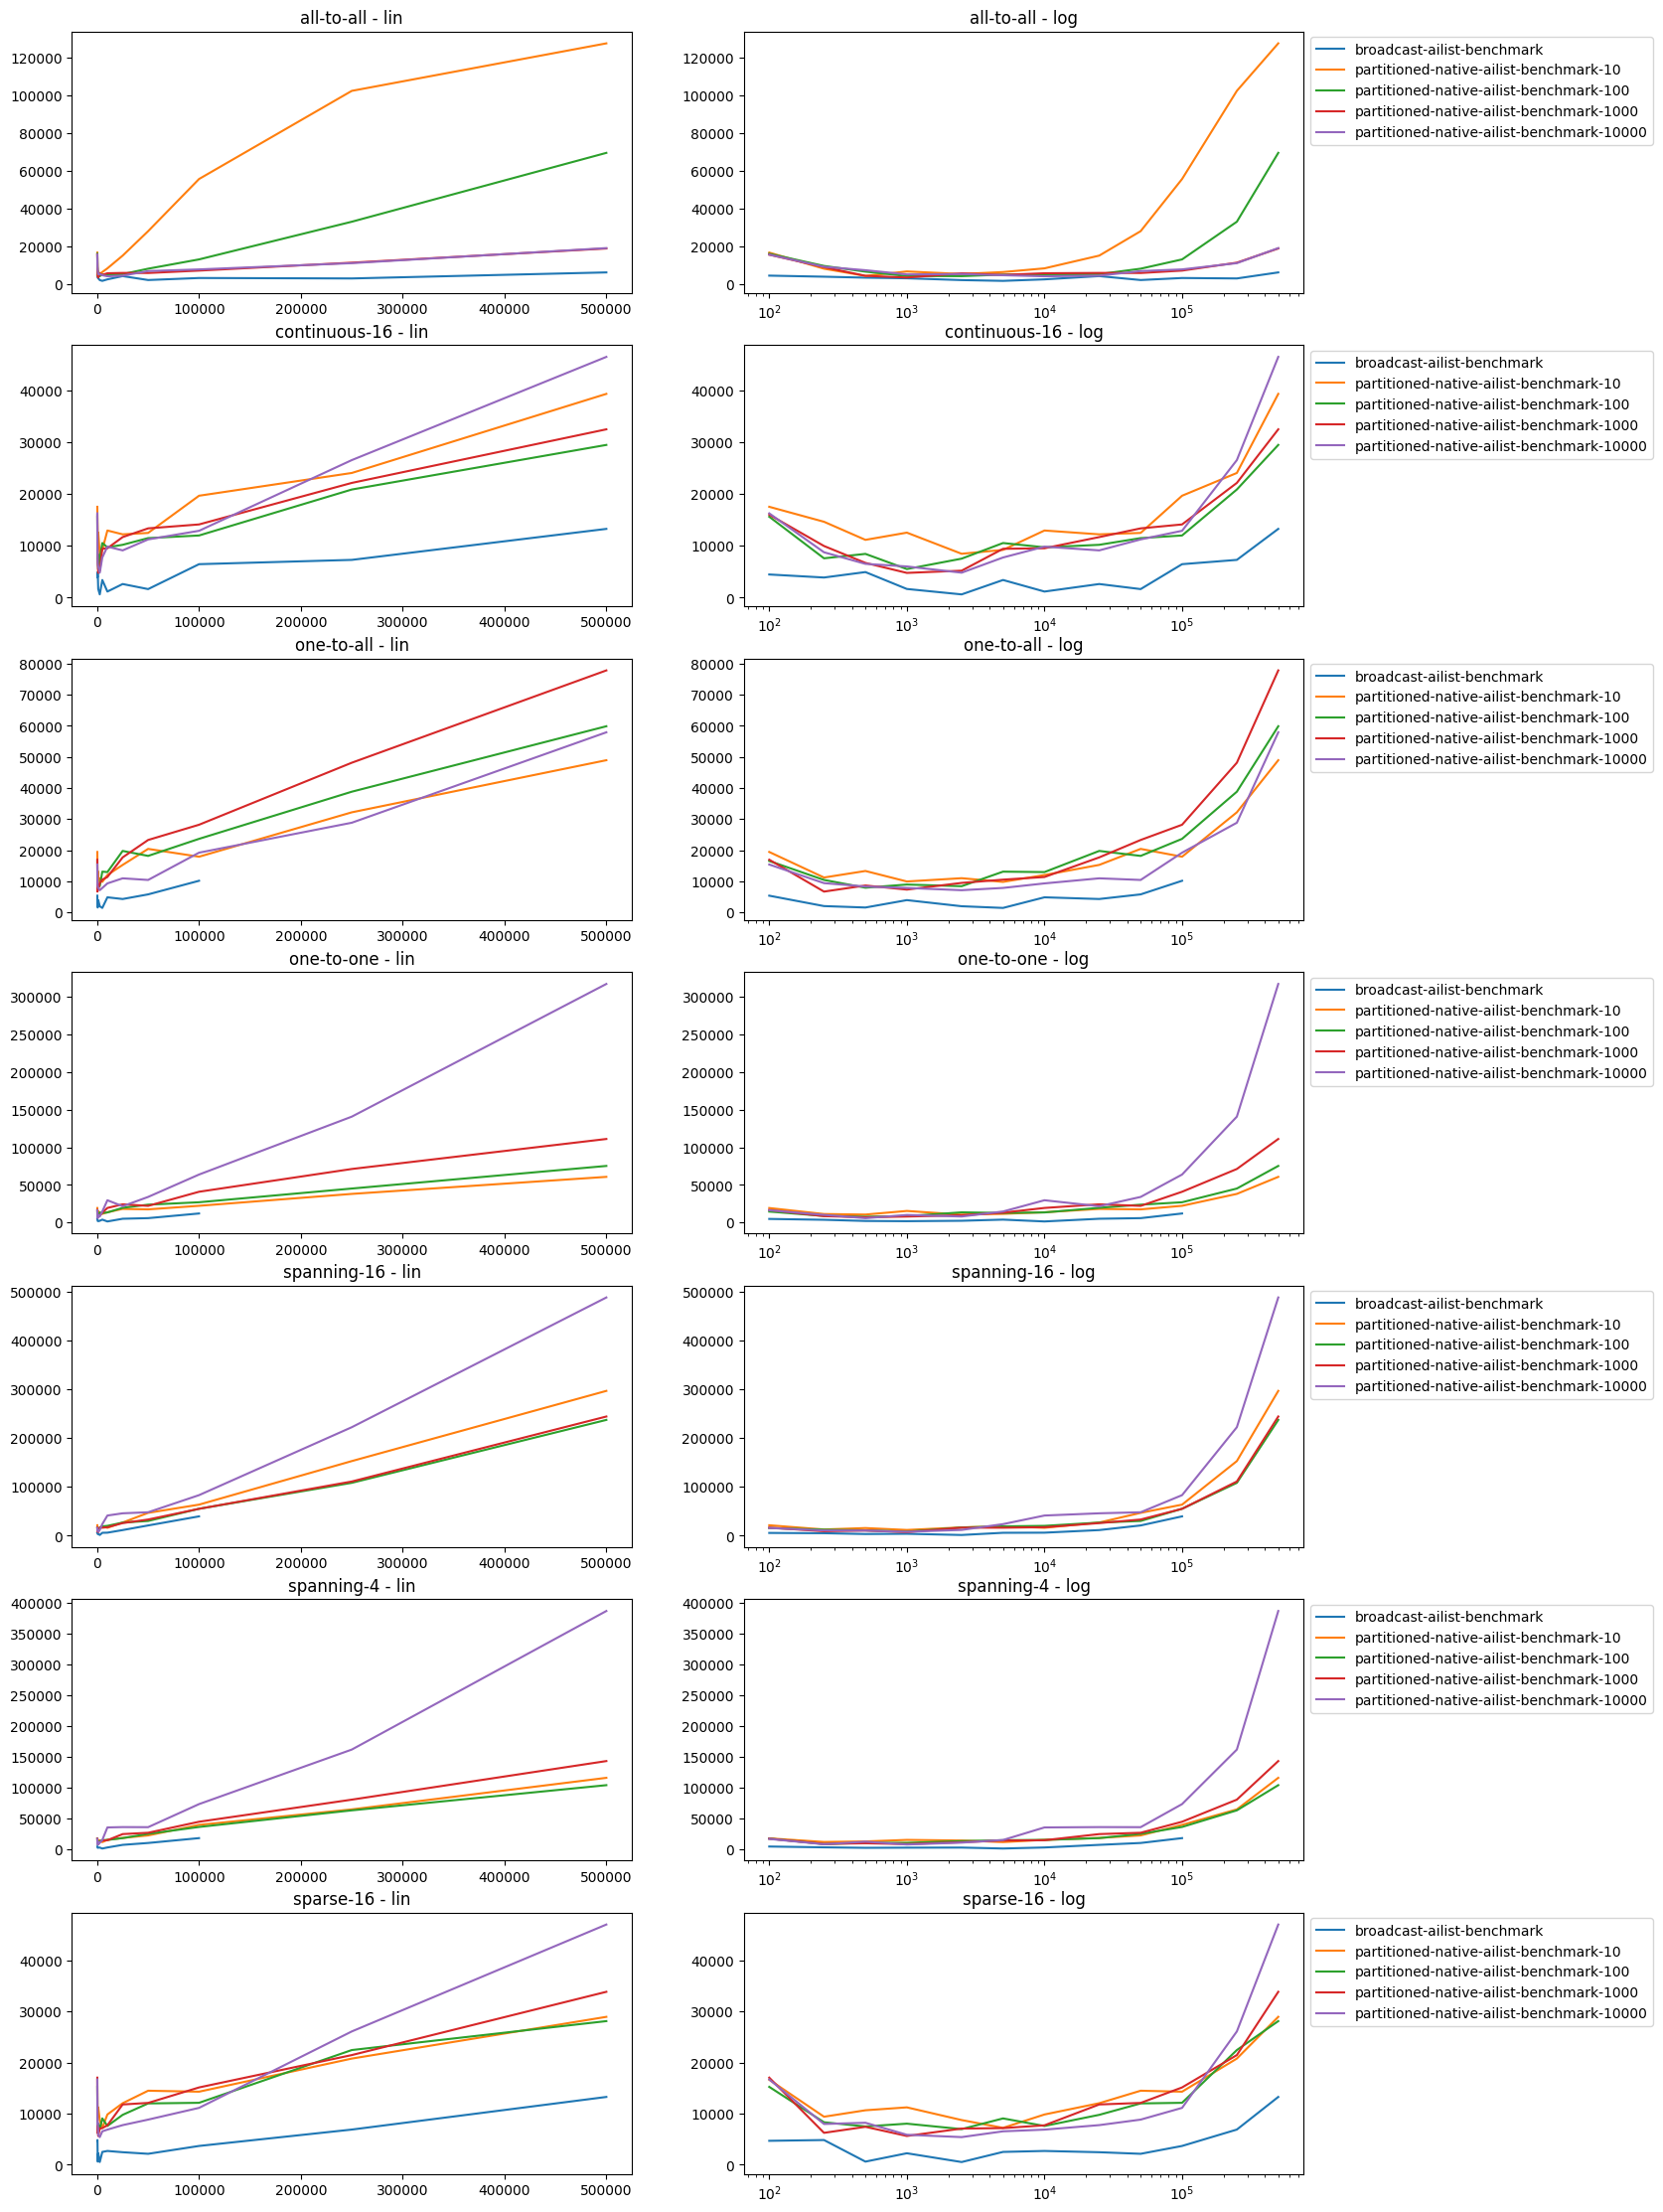

In [3]:
plot_dataset("cluster-4G-6G")